In [2]:
# import all basic lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Ketan Gangal\\OneDrive\\Desktop\\python_basic\\Ml\\05 Supervised models'

In [4]:
df = pd.read_csv("C:\\Users\\Ketan Gangal\\OneDrive\\Desktop\\python_basic\\Ml\\00 ml_course\\08-Linear-Regression-Models\\Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df['Total_spend'] = df['TV']+df['radio']+df['newspaper']

In [7]:
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

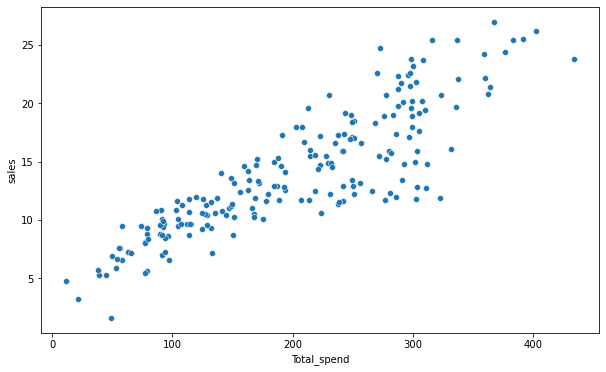

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Total_spend',y='sales')

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

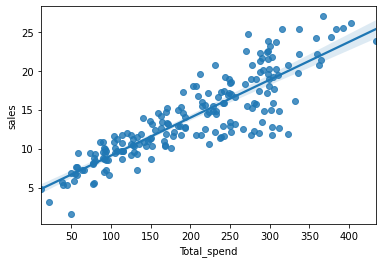

In [9]:
# direct linear regression using reg plot
sns.regplot(data=df,x='Total_spend',y="sales")

In [10]:
# ployfit for ols
# present in np
X = df['Total_spend'] # one feature 
y = df['sales']       # output

In [11]:
# y = mx+c
# y = B1X + B0

In [12]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [13]:
#b1 = 0.04868788
#b0 = 4.24302822

In [14]:
potential_spend = np.linspace(0,500,100)

In [15]:
predict = np.polyfit(X,y,deg=1)[0]*potential_spend + np.polyfit(X,y,deg=1)[1]

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

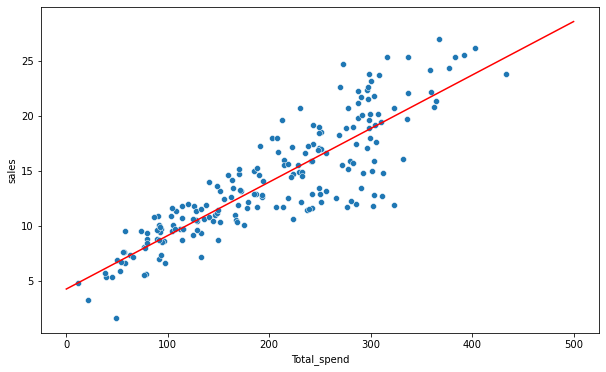

In [16]:
plt.figure(figsize=(10,6))
plt.plot(potential_spend,predict,color = 'red')
sns.scatterplot(data=df,x='Total_spend',y='sales')

In [17]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
pot = np.linspace(0,500,100)

In [21]:
pred =  3.07615033e-07*pot**3 -1.89392449e-04*pot**2 + 8.20886302e-02*pot + 2.70495053e+00

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

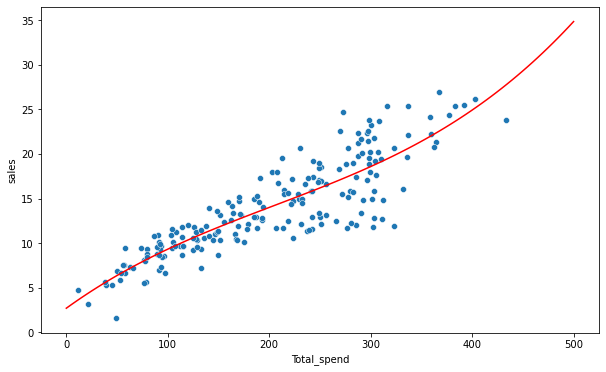

In [22]:
plt.figure(figsize=(10,6))
plt.plot(pot,pred,'r')
sns.scatterplot(data=df,x='Total_spend',y='sales')

# Model Training

In [22]:
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


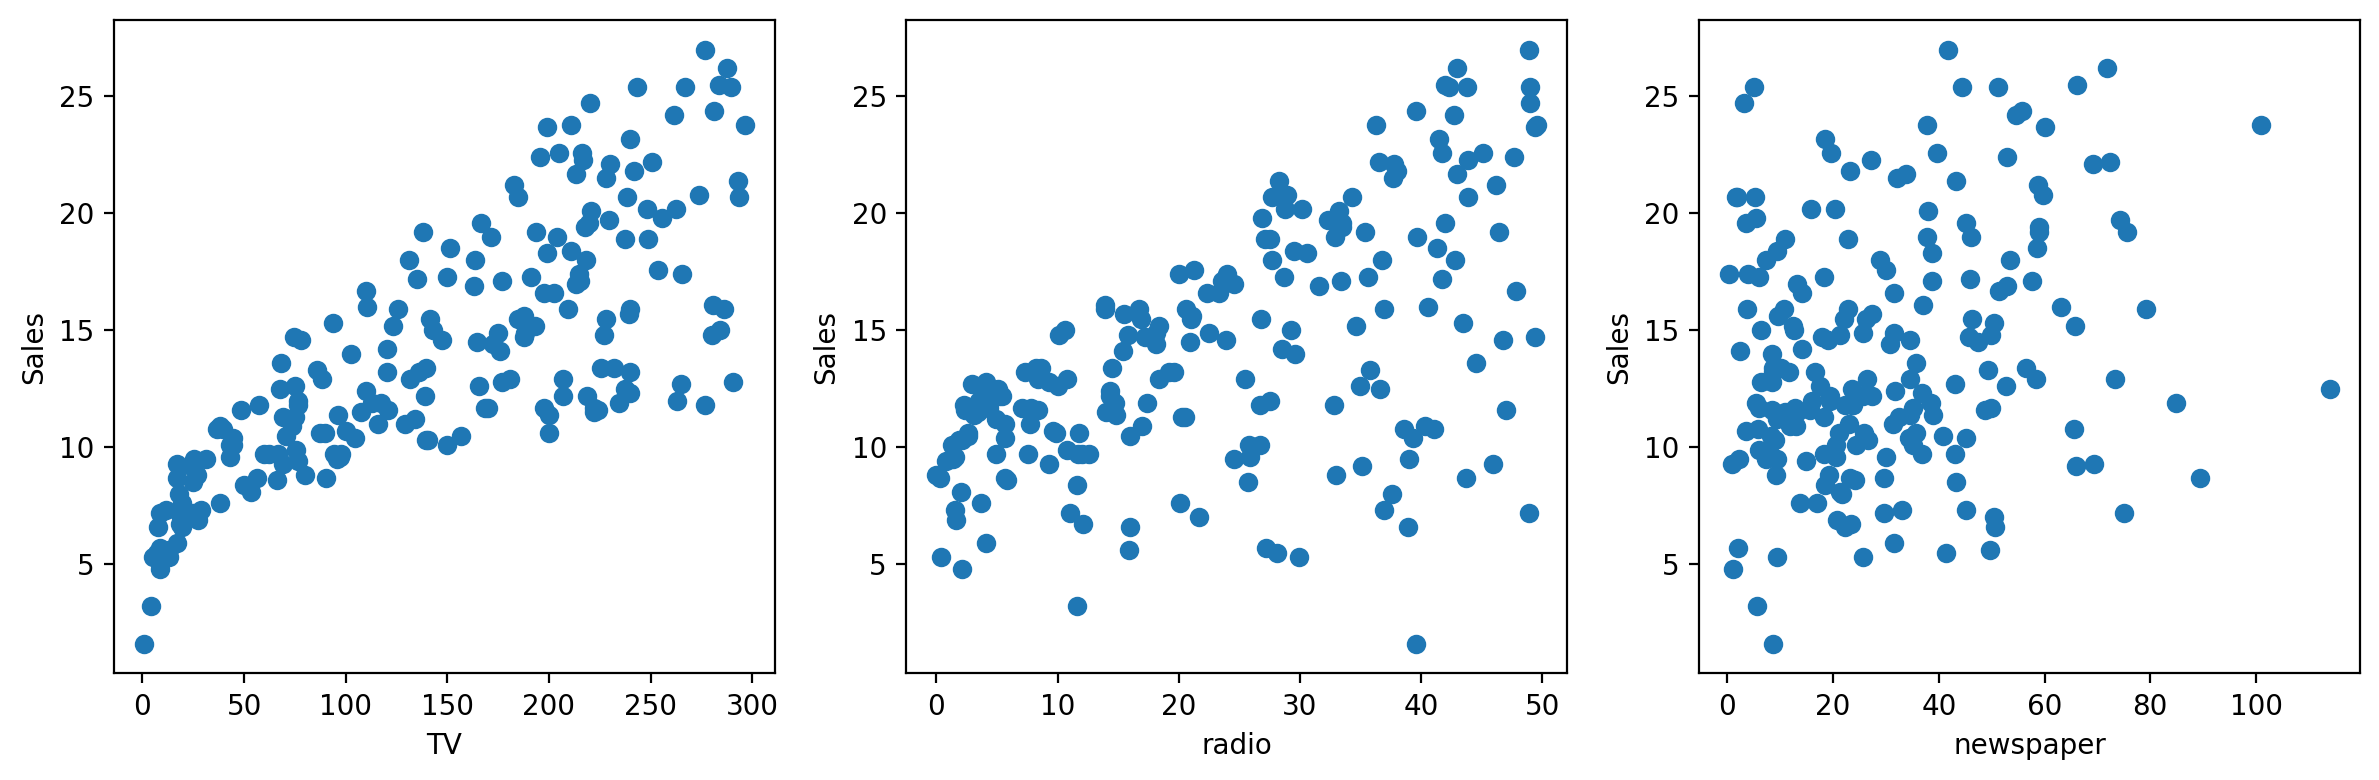

In [23]:
fig,ax = plt.subplots(nrows=1,ncols= 3,figsize=(12,4),dpi=200)

ax[0].plot(df['TV'],df['sales'],'o')
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')

ax[1].plot(df['radio'],df['sales'],'o')
ax[1].set_xlabel('radio')
ax[1].set_ylabel('Sales')

ax[2].plot(df['newspaper'],df['sales'],'o')
ax[2].set_xlabel('newspaper')
ax[2].set_ylabel('Sales')
fig.tight_layout()

**Beta value will tell us about which feature is more important and how**

task 1 first seperate feature and label

task 2 train test split

In [24]:
X = df.drop(['sales','Total_spend'],axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

**Train test split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [28]:
len(X_train)

140

In [29]:
len(X_test)

60

**Model call and Train**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# hyperparameters are the constants within the model we edit them to adjust performance
# things you can edit
#help(LinearRegression)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
predict = model.predict(X_test)

**Performace Evaluation**

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
df['sales'].mean()

14.022500000000003

In [37]:
y_test.mean()

13.348333333333326

In [38]:
y_train.mean()

14.311428571428571

In [39]:
mean_absolute_error(y_test,predict) #MAE

1.213745773614481

In [40]:
mean_squared_error(y_test,predict) #MSE

2.2987166978863782

In [41]:
np.sqrt(mean_squared_error(y_test,predict)) #RMSE

1.516151937599388

<AxesSubplot:xlabel='sales', ylabel='Count'>

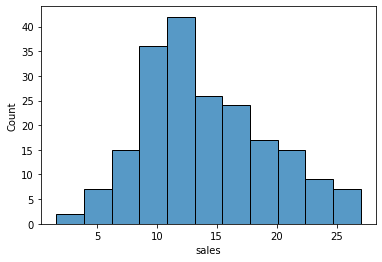

In [42]:
sns.histplot(data = df,x='sales')

**Evaluating Residuals**

In [43]:
#predict_for_x_train = model.predict(X_train)

In [44]:
sns.scatterplot(data=df,x=y_train,y=y_train-predict_for_x_train)
plt.axhline(y=0,ls='--',color = 'r')

NameError: name 'predict_for_x_train' is not defined

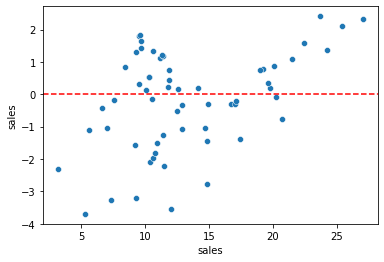

In [45]:
sns.scatterplot(data=df,x=y_test,y=y_test-predict)
plt.axhline(y=0,ls='--',color = 'r')

<AxesSubplot:xlabel='sales', ylabel='Density'>

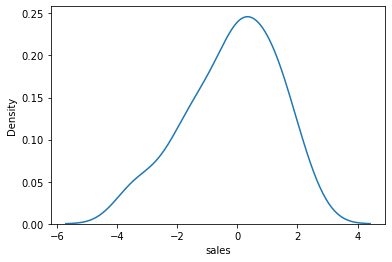

In [313]:
sns.kdeplot(data=df,x=y_test-predict)

In [314]:
len(y_test)

60

In [315]:
len(predict)

60

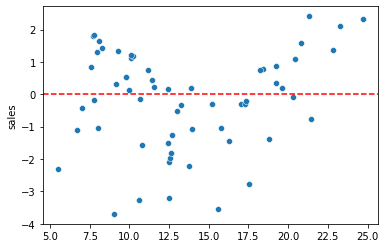

In [46]:
sns.scatterplot(x=predict,y=y_test-predict)
plt.axhline(y=0,ls='--',color = 'r')

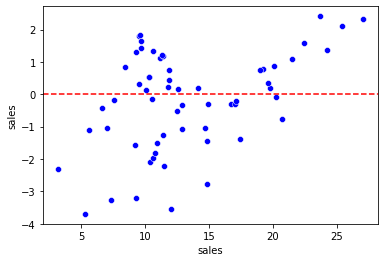

In [47]:
sns.scatterplot(data=df,x=y_test,y=y_test-predict,color='b')
plt.axhline(y=0,ls='--',color = 'r')


# Deployment

In [48]:
final_model = LinearRegression()

In [49]:
final_model.fit(X,y)

LinearRegression()

In [50]:
len(X),len(y)

(200, 200)

In [51]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
predicted_final = final_model.predict(X)

In [53]:
residuals = y- predicted_final 

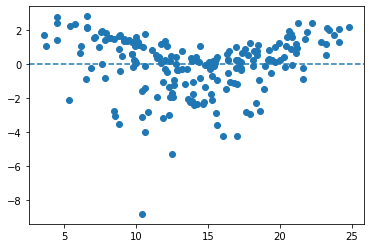

In [54]:
plt.plot(predicted_final,residuals,'o')
plt.axhline(ls='--')

In [55]:
from joblib import dump,load

In [56]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [57]:
sales_model = load('final_sales_model.joblib')

In [58]:
sales_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [61]:
campaign = [[400,140,50]]

In [62]:
sales_model.predict(campaign)

array([47.58707527])